<a href="https://colab.research.google.com/github/Aleksis409/python_telegram/blob/main/dz_2_3/%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D1%8C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install opendatasets
import opendatasets as od
import pandas as pd
from fastai.text.all import *

In [4]:
# od.download("https://www.kaggle.com/competitions/word2vec-nlp-tutorial/")
# !unzip/content/word2vec-nlp-tutorial/labeledTrainData.tsv.zip
train = pd.read_csv("/content/word2vec-nlp-tutorial/labeledTrainData.tsv", header=0, delimiter="\t", quoting=3)
test = pd.read_csv("/content/word2vec-nlp-tutorial/testData.tsv", header=0, delimiter="\t", quoting=3)

In [5]:
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<b..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different things in a movie. Those who envision themselves as amateur \""critics\"" look only to criticize everyth..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell) giving welcome investors (Robert Carradine) to Primal Park . A secret project mutating a primal animal using fossilized DNA, like ¨Jurassik Park¨, and some scientists resurrect one of nature's most fearsome predators, the Sabretooth tiger or Smilodon . Scientific ambition turns deadly, however, and when the high voltage fence is opened the creature escape and begins savagely stalking its prey - the human visitors , tourists and scientific.Meanwhile some youngsters enter in the restricted area of the security center and are attacked by a pack ..."
3,"""3630_4""",0,"""It must be assumed that those who praised this film (\""the greatest filmed opera ever,\"" didn't I read somewhere?) either don't care for opera, don't care for Wagner, or don't care about anything except their desire to appear Cultured. Either as a representation of Wagner's swan-song, or as a movie, this strikes me as an unmitigated disaster, with a leaden reading of the score matched to a tricksy, lugubrious realisation of the text.<br /><br />It's questionable that people with ideas as to what an opera (or, for that matter, a play, especially one by Shakespeare) is \""about\"" should be a..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious 80's exploitation, hooray! The pre-credits opening sequences somewhat give the false impression that we're dealing with a serious and harrowing drama, but you need not fear because barely ten minutes later we're up until our necks in nonsensical chainsaw battles, rough fist-fights, lurid dialogs and gratuitous nudity! Bo and Ingrid are two orphaned siblings with an unusually close and even slightly perverted relationship. Can you imagine playfully ripping off the towel that covers your sister's naked body and then stare at her unshaven genitals..."


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         792 non-null    object
 1   sentiment  792 non-null    int64 
 2   review     792 non-null    object
dtypes: int64(1), object(2)
memory usage: 18.7+ KB


In [7]:
dls = TextDataLoaders.from_df(train , seed= 1234567899, text_col=2,label_col = 1)
dls.show_batch()

,text,category
0,"xxbos "" warning : xxup possible xxup spoilers ( but not really - keep reading ) . a xxrep 3 h , there are so many reasons to become utterly addicted to this spoof gem that i wo n't have room to list them all . xxmaj the opening credits set the xxunk scene with xxunk late 1950s cartoon xxunk ; an xxunk xxmaj xxunk ' xxunk ' xxmaj xxunk xxunk theme which appears to be curiously uncredited ( but his xxunk are unmistakable , and no - one else did them ) ; and with familiar cast names , including xxmaj kathy xxmaj xxunk a full year before she hit with xxmaj sister xxmaj acts 1 & 2 plus xxmaj xxunk xxmaj xxunk from tv 's xxmaj superman . \n\n xxmaj every scene is xxunk with shallow xxunk xxunk at various actors , actresses and producers in xxunk xxup",1
1,"xxbos "" this film reminds me of 42nd xxmaj street starring xxmaj xxunk xxmaj daniels and xxmaj xxunk xxmaj xxunk . xxmaj when i watch this film a lot of it reminded me of 42nd xxmaj street , especially the character xxmaj xxunk who 's a temperamental star and she ends up falling and breaks her xxunk , like xxmaj xxunk xxmaj daniels did in 42nd xxmaj street and another performer gets the part and become a star . xxmaj this film , like most race films , keeps people watching because of the great entertainment . xxmaj race films always showed xxmaj black xxmaj entertainment as it truly was that was popular in that time era . xxmaj the xxmaj dancing xxmaj styles , xxmaj the xxmaj music , xxmaj dressing xxmaj styles , xxmaj you 'll xxmaj love xxmaj it . xxmaj this movie could of been big",1
2,"xxbos "" title : xxmaj zombie 3 ( 1988 ) \n\n xxmaj directors : xxmaj mostly xxmaj lucio xxmaj fulci , but also xxmaj xxunk xxmaj fragasso and xxmaj bruno xxmaj mattei \n\n xxmaj cast : xxmaj xxunk xxunk , xxmaj xxunk xxmaj xxunk , xxmaj xxunk xxmaj ring , xxmaj xxunk xxmaj xxunk \n\n xxmaj review : \n\n xxmaj to review this flick and get some good background of it , i got ta start by the beginning . xxmaj and the beginning of this is really xxmaj george xxmaj xxunk xxmaj dawn of the xxmaj dead . xxmaj when xxmaj dawn came out in xxunk , xxmaj lucio xxmaj fulci decided to make an xxunk sequel to it and call it xxmaj zombie 2 . xxmaj that film is the one we know as plain xxunk xxmaj zombie . xxmaj you know the one in which the zombie",0
3,"xxbos "" when a movie of a book seems pointless and incomprehensible , the cause can xxunk be found in the book : either it was pointless to start with , or the point is one not easily conveyed to film , or the movie missed the point , which is the most xxunk of these results , and the xxunk to happen , especially when the point is one not easily xxunk . xxmaj the book "" morvern xxmaj xxunk "" has a point ; every reader of the book must have felt this , and felt as if he had gotten it ; but i suspect most of them could not state it in words . xxmaj i 'm not sure i can , myself , but perhaps it comes to this , or something like it : xxmaj things come , things go , such is life",0
4,"xxbos "" in what could have been seen as a coup towards the sexual "" revolution "" ( xxunk i use xxunk for that word ) , xxmaj jean xxmaj eustache wrote and directed xxmaj the xxmaj mother and the xxmaj whore as a poetic , damning critique of those who ca n't seem to get enough love . xxmaj if there is a message to this xxunk and xxmaj i 'd hope that the message would come only after the fact of what else this ben - xxunk length feature has to xxunk it 's that in order to love , honestly , there has to be some level of happiness , of real truth . xxmaj is it possible to have two lovers ? xxmaj some can try , but what is the outcome if no one can really have what they really want , or feel they",1
5,"xxbos "" hello xxmaj mary xxmaj lou : xxmaj prom xxmaj night xxup ii starts at the xxmaj hamilton xxmaj high xxmaj school prom of xxunk where xxmaj mary xxmaj lou xxmaj xxunk ( xxunk xxmaj xxunk ) is cheating on her date xxmaj bill xxmaj xxunk ( steve xxmaj xxunk ) wi

In [8]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy,
                                loss_func = CrossEntropyLossFlat())

SuggestedLRs(valley=0.005248074419796467)

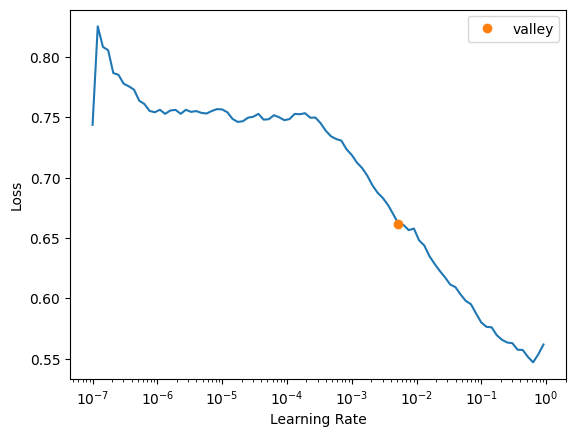

In [9]:
learn.lr_find()

In [11]:
learn.fine_tune(10, 0.005)

epoch,train_loss,valid_loss,accuracy,time
0,0.670704,0.674690,0.493671,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.472854,0.656374,0.525316,00:10
1,0.442194,0.580950,0.708861,00:10
2,0.409060,0.472326,0.784810,00:10
3,0.372845,0.404676,0.841772,00:10
4,0.327124,0.476315,0.816456,00:10
5,0.291508,0.419890,0.797468,00:10
6,0.261311,0.494014,0.803797,00:10
7,0.229287,0.502860,0.791139,00:10
8,0.203419,0.498946,0.803797,00:10
9,0.182726,0.493683,0.816456,00:10


In [12]:
learn.show_results()

,text,category,category_
0,"xxbos "" oh xxmaj dear xxmaj lord , xxmaj how on xxmaj earth was any part of this film ever xxunk by anyone ? xxmaj it xxunk of cheese from start to finish , but it 's not even good cheese . xxmaj it 's the xxunk , xxunk , most xxunk cheese there is , and i can not believe there is anyone out there who actually , truly enjoyed it . xxmaj yes , if you saw it with a load of drunk / stoned buddies then some bits might be funny in a sad kind of way , but for the rest of the audience the only entertaining parts are when said group of buddies are throwing popcorn and abusive insults at each other and the screen . i watched it with an up - for - a - few - laughs guy , having had a",0,0
1,"xxbos "" anyone who knows me even remotely can tell you that i love bad movies almost as much as i love great ones , and i can honestly say that i have finally seen one of the all - time legendary bad movies : the almost xxunk mess that is xxup myra xxup breckinridge . xxmaj an adaptation of xxmaj gore xxmaj xxunk 's best - selling book ( he later xxunk this film version ) , the star - xxunk xxup myra xxup breckinridge is truly a movie so bad that it remains xxunk entertaining from beginning to end . xxmaj the xxmaj x - rated movie about sex change xxunk and xxmaj hollywood was an absolute catastrophe at the box office and was literally xxunk off the screen by both critics and audiences at the time of it 's release . xxmaj not surprisingly , the film",0,0
2,"xxbos "" elegance and class are not always the first words that come to mind when folks ( at least folks who might do such a thing ) sit around and talk about film noir . \n\n xxmaj yet some of the best films of the genre , "" out of the xxmaj past , "" "" the xxmaj killers , "" "" in a xxmaj lonely xxmaj place , "" "" night and the xxmaj city , "" manage a level of xxunk xxunk that xxunk them beyond a moody catch xxunk and its xxunk of xxunk shadows , xxunk , and femme - xxunk . \n\n "" where the xxmaj sidewalk xxmaj ends , "" a fairly difficult to find film -- the only copy in perhaps the best xxunk video store in xxmaj manhattan was a rough xxunk from the xxup xxunk cable channel -- belongs in",1,1
3,"xxbos "" this xxunk , short - lived series ( a xxunk two seasons ) is about as xxunk and unique as a xxunk driver going to a xxunk bar . i am not quite sure what they mean by "" ground - breaking "" and "" original "" when they xxunk all over xxmaj lynch and his silly little xxup tv opus . xxmaj what exactly is their xxunk of what is original ? xxmaj sure , compared to the "" bill xxmaj xxunk xxmaj show "" or "" hill xxmaj street xxmaj blues "" it 's original . xxmaj definitely . xxmaj next to "" law & xxmaj order "" xxup tp xxunk originality left and right . \n\n xxmaj fans of xxup tp often say that the show was canceled because too many viewers were n't smart enough , open enough for the show 's supposed """,0,0
4,"xxbos "" the funny sound that you may hear when you xxunk this execrable version of xxmaj xxunk xxmaj xxunk 's classic "" journey to the xxmaj center of the xxmaj earth "" is xxmaj xxunk spinning in his grave . xxmaj the only thing about this 80 minute opus that has anything to do with "" journey to the xxmaj center of the xxmaj earth "" is the title . xxmaj otherwise , everything else in this lackluster production is new and not worth watching . xxmaj in fact , the director has written here at xxunk that he directed only eight minutes of "" journey to the xxmaj center of the xxmaj earth "" and the studio xxunk on part of "" xxunk "" xxunk xxmaj albert xxmaj pyun 's sequel to his own "" alien from xxup l.a . "" with xxmaj kathy xxmaj ireland . xxmaj",0,0
5,"xxbos "" it 's interesting how 90 % of the high - vote reviews are all comprised of "" * random xxunk * "" from "" united xxmaj states "" ( no state pride ? ? ) who all say more or less the exact same thing with the exact same xxunk style and all with the exact same complete lack of taste in movies . i